# World Happiness Analysis
#### By Tom Allen <br>
The World Happiness Report is an annual report released by the United Nations, beginning in 2012 to measure overall happiness in the world. It has gained global recognition from governments, non-profits, and other organizations to see what happiness indicators lack in a certain country/region, in order to improve. This analysis will primarily use the 2019 World Happiness Report. 

### Import Common Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Datasets
__df2019:__ contains the 2019 Happiness Report <br>
__df2017:__ contains the Dystopia Residual which is not included in df2019 <br>
__df2015:__ contains historical comparison data <br>

In [2]:
df2019 = pd.read_csv('happiness_2019.csv') 
df2017 = pd.read_csv('Happiness_2017.csv') 
df2015 = pd.read_csv('Happiness_2015.csv') 

### Quick Glance at DataFrames

In [3]:
df2019.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


In [4]:
df2017.head(1)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


In [5]:
df2015.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


## Data Cleaning <br>
### Rename to Simpler Column Names

In [6]:
df2019.rename(columns = {'Overall rank':'Rank'}, inplace = True)
df2019.rename(columns = {'Country or region':'Country'}, inplace = True)
df2019.rename(columns = {'GDP per capita':'GDP'}, inplace = True)
df2019.rename(columns = {'Social support':'Soc_Support'}, inplace = True)
df2019.rename(columns = {'Healthy life expectancy':'Life_Exp'}, inplace = True)
df2019.rename(columns = {'Freedom to make life choices':'Freedom'}, inplace = True)
df2019.rename(columns = {'Perceptions of corruption':'Trust'}, inplace = True)

### Variables  
__Country__ = Name of country   
__Rank__ = Rank of the country based on the Happiness Score  
__Score__ = Metric measured by surveying people to rate their happiness on a scale 0-10 where 10 is the most happy  
__GDP__ = The extent to which GDP contributed to the calculation of the Happiness Score  
__Soc_Support__ = The extent to which social support amongst the community contributed to the Happiness Score  
__Life_Exp__ = The extent to which life expectancy contributed to the Happiness Score  
__Freedom__ = The extenet to which freedom to make life choices contributed to the calculation of the Happiness Score  
__Generosity__ = The extent to which genorosity amongst the community contributed to the Happiness Score  
__Trust__ = The extent to which trust in the government contributed to the Happiness Score<br>   __Dys_Res__ = The unexplained components when determining the Happiness Score that reflect the country being no worse than a 'Dystopia' (used as a becnchmark)      

### Clean df2017 
Want __df2017__ to only conatin the Country (the key to eventually merge on) and Dystopia Residual since it isn't present in __df2019__

In [7]:
df2017 = df2017[['Country','Dystopia.Residual']]

### Create a New DataFrame with the Dystopia Residual 
Creates a new DataFrame __(df)__ by merging on the key 'Country' in order to add the Dystopia Residual from __df2017__

In [8]:
df = pd.merge(df2019, df2017, how = 'inner', on = 'Country')

### Add Country Codes to DataFrame
__world_GDP__ is a DataFrame containing Country Name, Country Code and GDP (Billions). Using it to add the Country Code to the DataFrame.

In [9]:
world_GDP = pd.read_csv('2014_World_GDP') 
world_GDP.rename(columns = {'COUNTRY':'Country'}, inplace = True)
world_GDP.drop('GDP (BILLIONS)', axis = 1, inplace = True)

### Get Final DataFrame (world) to Analyze On

In [10]:
world = pd.merge(df, world_GDP, how = 'inner', on = 'Country')
world.head(1)

,Rank,Country,Score,GDP,Soc_Support,Life_Exp,Freedom,Generosity,Trust,Dystopia.Residual,CODE
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393,2.430182,FIN


### Cleaning the world DataFrame
Drops the Score column since the Dystopia Residual is from 2017, so the Score column won't add up.

In [11]:
world.drop('Score',axis = 1, inplace = True)
world.rename(columns = {'Dystopia.Residual':'Dys_Res'}, inplace = True)

Re-adds all the factors that contribute to the Score column.

In [12]:
world['Score'] = world['GDP'] + world['Soc_Support'] + world['Life_Exp']+ world['Freedom'] + world['Generosity'] + world['Trust'] + world['Dys_Res']

Drops the Rank column since the rankings need to be readjusted due to the new scores.

In [13]:
world.drop('Rank', axis = 1, inplace = True)

Reorders the __world__ DataFrame by the new ranking based on the Score.

In [14]:
world['Rank'] = world['Score'].rank(ascending = 0)
world['Rank'] = world['Rank'].apply(np.int64)
world.sort_values(by = ['Rank'], inplace = True)
world.reset_index(inplace = True, drop = True)

### Cleaning the df2015 DataFrame 
Renames the columns in __df2015__ to match the __world__ DataFrame.

In [15]:
df2015.rename(columns = {'Happiness Rank':'Rank'}, inplace = True)
df2015.rename(columns = {'Happiness Score':'Score'}, inplace = True)
df2015.rename(columns = {'Economy (GDP per Capita)':'GDP'}, inplace = True)
df2015.rename(columns = {'GDP per capita':'GDP'}, inplace = True)
df2015.rename(columns = {'Family':'Soc_Support'}, inplace = True)
df2015.rename(columns = {'Health (Life Expectancy)':'Life_Exp'}, inplace = True)
df2015.rename(columns = {'Dystopia Residual':'Dys_Res'}, inplace = True)
df2015.rename(columns = {'Trust (Government Corruption)':'Trust'}, inplace = True)

### Create Final df2015 DataFrame
Adds the Country Code column from __world_GDP__ and drops irrelevant columns


In [16]:
df2015 = pd.merge(df2015, world_GDP, how = 'inner', on = 'Country')
df2015.drop(['Region','Standard Error'], axis = 1, inplace = True)

In [17]:
df2015.head()

,Country,Rank,Score,GDP,Soc_Support,Life_Exp,Freedom,Trust,Generosity,Dys_Res,CODE
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,CHE
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,ISL
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,DNK
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NOR
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,CAN


## Data Visualizations

### World Happiness Map
Cool interactive map to see what countries/regions are the most happy. __Would only be able to view if copied and ran in a Jupyter Notebook__

In [18]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [19]:
world_happy = dict(type = 'choropleth', locations = world['CODE'], z = world['Score'], 
                      text = world['Country'], colorbar = {'title' : 'Happiness Score'},)

In [20]:
layout = dict(title = 'Happiness Score by Country', geo = dict(showframe = False, projection = {'type':'mercator'}))

In [21]:
choromap1 = go.Figure(data = [world_happy], layout = layout)
iplot(choromap1)

### Freedom in the Middle East
Wanted to get an idea of how responders in the Middle East felt their freedom to make life choices impacted their happiness, as it is beleived they are limited in this respect. 

I also wanted to see whether their responses have changed over the last 5 years, due to Western influence.

In [22]:
middle_east_countries = ['Iran','Iraq','Syria', 'Israel', 'Saudi Arabia','Turkey','Egypt']
middle_east_2019 = world[world.Country.isin(middle_east_countries)]
middle_east_2015 = df2015[df2015.Country.isin(middle_east_countries)]

Text(0, 0.5, 'Freedom Score')

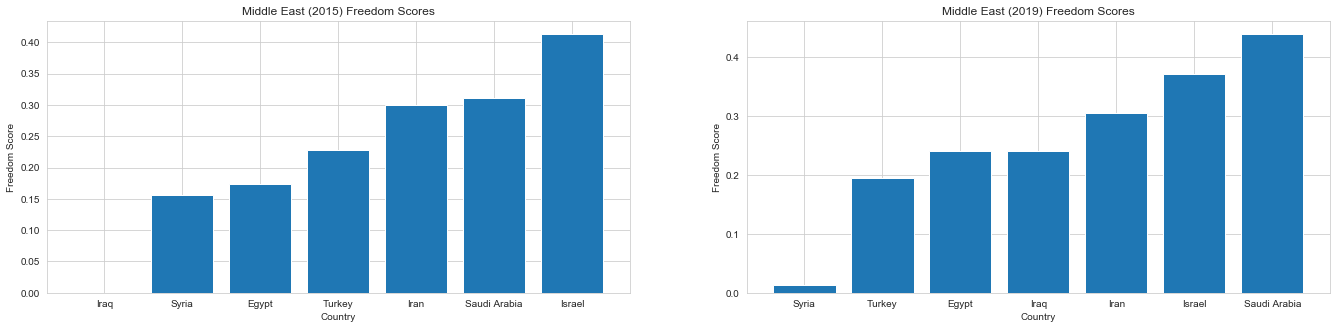

In [23]:
sns.set_style('whitegrid')
f, ax = plt.subplots(1,2, figsize = (23,5))
ax[0].bar('Country','Freedom', data = middle_east_2015.sort_values('Freedom'))
ax[0].set_title('Middle East (2015) Freedom Scores')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Freedom Score')
ax[1].bar('Country','Freedom', data = middle_east_2019.sort_values('Freedom'))
ax[1].set_title('Middle East (2019) Freedom Scores')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Freedom Score')

In [24]:
me2019 = round(middle_east_2019['Freedom'].mean(),2)
me2015 = round(middle_east_2015['Freedom'].mean(),2)
print(f'In 2015 the mean Freedom score was {me2015}, whereas in 2019 the score was {me2019}.')

In 2015 the mean Freedom score was 0.23, whereas in 2019 the score was 0.26.


Overall, the Freedom score in the Middle East slightly improved, but note Iraq had a Freedom score of 0.0 in 2015. This may be an error, but I am assuming the data was collected correctly and that the responders in Iraq truly beleived their Freedom score was a 0.0. <br> <br>
One thing I noticed was Saudi Arabia's Freedom score increase from roughly 0.31 to 0.45. Maybe because of Mohammad bin Salman's appointment to crown prince in June of 2017 and his desire to reform the country?

### Add Continents to the DataFrame
Found this __countryinfo.py__ script online at: https://gist.github.com/mjrulesamrat/0c1f7de951d3c508fb3a20b4b0b33a98 which contains the country and continent it is on. 

In [25]:
from countryinfo import countries as country_data

In [26]:
continents = pd.DataFrame(country_data)
continents.head()

,timezones,code,continent,name,capital
0,[Europe/Andorra],AD,Europe,Andorra,Andorra la Vella
1,[Asia/Kabul],AF,Asia,Afghanistan,Kabul
2,[America/Antigua],AG,North America,Antigua and Barbuda,St. John's
3,[Europe/Tirane],AL,Europe,Albania,Tirana
4,[Asia/Yerevan],AM,Asia,Armenia,Yerevan


### Cleaning the continents DataFrame
Only want the Country column (to eventuall merge on) and Continent column

In [27]:
continents.drop(['timezones','code','capital'], axis = 1, inplace = True)
continents.rename(columns = {'continent':'Continent'}, inplace = True)
continents.rename(columns = {'name':'Country'}, inplace = True)

### Merge the Continents into the world DataFrame

In [28]:
world = pd.merge(world, continents, how = 'inner', on = 'Country')

In [29]:
world.head()

,Country,GDP,Soc_Support,Life_Exp,Freedom,Generosity,Trust,Dys_Res,CODE,Score,Rank,Continent
0,Norway,1.488,1.582,1.028,0.603,0.271,0.341,2.277027,NOR,7.590027,1,Europe
1,Denmark,1.383,1.573,0.996,0.592,0.252,0.410,2.313707,DNK,7.519707,2,Europe
2,Finland,1.340,1.587,0.986,0.596,0.153,0.393,2.430182,FIN,7.485182,3,Europe
3,Switzerland,1.452,1.526,1.052,0.572,0.263,0.343,2.276716,CHE,7.484716,4,Europe
4,Iceland,1.380,1.624,1.026,0.591,0.354,0.118,2.322715,ISL,7.415715,5,Europe


## Trust in Government 

### Trust in Government Boxplot
We can see Oceania has the most trust in their Government, but another interesting point is the wide range in Trust scores in Europe, depicted by the large margin between the upper and lower quartiles.

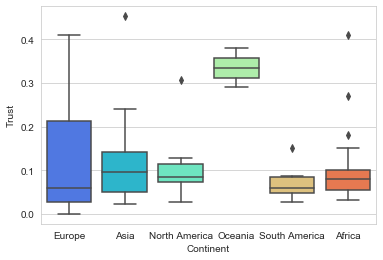

In [30]:
sns.boxplot(x = 'Continent',y = 'Trust', data = world, palette = 'rainbow')

### Quick View of the Statistics
We can see that Europe has the highest standard deviation (by a decent amount) which measures the variation of Trust scores among the countries on that continent. 

In [31]:
byContinent = world.groupby('Continent')['Trust']
byContinent.describe()

,count,mean,std,min,25%,50%,75%,max
Continent,,,,,,,,
Africa,38.0,0.093079,0.070366,0.033,0.05500,0.0800,0.10000,0.411
Asia,38.0,0.106684,0.079184,0.023,0.05075,0.0965,0.14075,0.453
Europe,36.0,0.127361,0.131279,0.000,0.02650,0.0605,0.21400,0.410
North America,12.0,0.104333,0.070308,0.028,0.07375,0.0855,0.11425,0.308
Oceania,2.0,0.335000,0.063640,0.290,0.31250,0.3350,0.35750,0.380
South America,10.0,0.068100,0.035457,0.027,0.04775,0.0600,0.08450,0.150


### Taking a Deeper Dive into Europe's Trust in Government

#### Creating a the Europe_Trust DataFrame
This DataFrame filters to only the European countries and sorts by their Trust scores.

In [32]:
Europe_Trust = world[world['Continent']=='Europe'].sort_values('Trust', ascending = False)

#### Seperating the Most and Least Trusting European Countries

In [33]:
Top_Europe = Europe_Trust.nlargest(10, 'Trust', keep = 'first')
Bottom_Europe = Europe_Trust.nsmallest(10, 'Trust', keep = 'first')

#### Plotting their Trust Scores

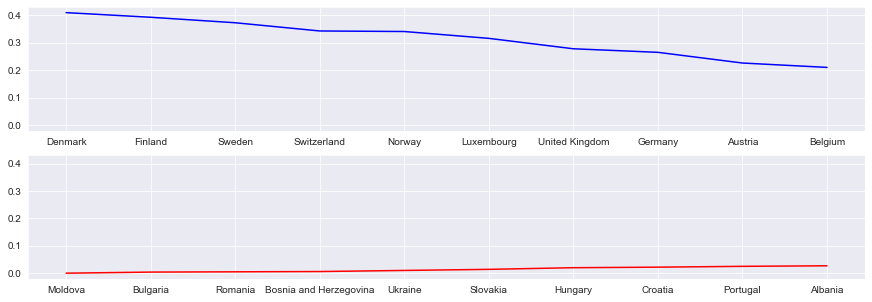

In [34]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, sharey = True, figsize = (15,5))
axes[0].plot('Country', 'Trust', data = Top_Europe, color = 'blue')
axes[1].plot('Country', 'Trust', data = Bottom_Europe, color = 'red')

_Can easily see the seperation between their Trust scores._

### Trust in Government Choropleth Map
Interesting interactive map to see which countries or regions have the most trust in their Government. Right away, we see the Nordic region (including Sweden, Norway and Finland) have a high Trust score, whereas some of their surrounding neighbors to the southeast do not. __Would only be able to view if copied and ran in a Jupyter Notebook__

In [35]:
world_trust = dict(type = 'choropleth', locations = world['CODE'], z = world['Trust'], 
                      text = world['Country'], colorbar = {'title' : 'Trust Score'},)

layout = dict(title = 'Trust in Government', geo = dict(showframe = False, projection = {'type':'mercator'}))

choromap2 = go.Figure(data = [world_trust], layout = layout)

iplot(choromap2)

## Has Overall Happiness Increased?

### Creating the Combined Years DataFrame

In [36]:
world['Year'] = 2019
df2015['Year'] = 2015

In [37]:
cols = ['Country','Score','Year']
df_2019 = world[cols]
df_2015 = df2015[cols]

In [38]:
combined_years = pd.concat([df_2019, df_2015])
combined_years.head()

,Country,Score,Year
0,Norway,7.590027,2019
1,Denmark,7.519707,2019
2,Finland,7.485182,2019
3,Switzerland,7.484716,2019
4,Iceland,7.415715,2019


### Happiness Score Boxplot
We can see a slight increase in the median from 2015 and there seems to be a little more concentration in 50% of the countries (narrower margin in the Interquartile Range). But the whiskers (both minimum and maximum) seem to be a little longer depicting some countries Happiness is improving, whereas others are actually decreasing...

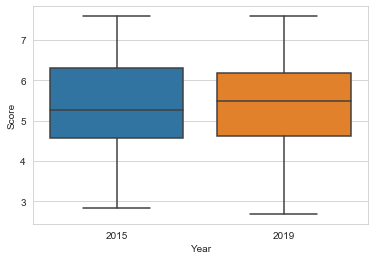

In [39]:
sns.set_style('whitegrid')
sns.boxplot(x = 'Year', y = 'Score', data = combined_years)

### One Final Look at the Happiness Rankings
Europe has the top 5 ranked countries all with Social Support being their top contributor to their Happiness Score. Seems as though the Nordic region has a strong sense of community and support from family and neighbors.  

In [40]:
world

,Country,GDP,Soc_Support,Life_Exp,Freedom,Generosity,Trust,Dys_Res,CODE,Score,Rank,Continent,Year
0,Norway,1.488,1.582,1.028,0.603,0.271,0.341,2.277027,NOR,7.590027,1,Europe,2019
1,Denmark,1.383,1.573,0.996,0.592,0.252,0.410,2.313707,DNK,7.519707,2,Europe,2019
2,Finland,1.340,1.587,0.986,0.596,0.153,0.393,2.430182,FIN,7.485182,3,Europe,2019
3,Switzerland,1.452,1.526,1.052,0.572,0.263,0.343,2.276716,CHE,7.484716,4,Europe,2019
4,Iceland,1.380,1.624,1.026,0.591,0.354,0.118,2.322715,ISL,7.415715,5,Europe,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Rwanda,0.359,0.711,0.614,0.555,0.217,0.411,0.540061,RWA,3.407061,136,Africa,2019
132,Tanzania,0.476,0.885,0.499,0.417,0.276,0.147,0.621130,TZA,3.321130,138,Africa,2019
133,Burundi,0.046,0.447,0.380,0.220,0.176,0.180,1.683024,BDI,3.132024,139,Africa,2019
134,Syria,0.619,0.378,0.440,0.013,0.331,0.141,1.061574,SYR,2.983574,140,Asia,2019


### Factors Mostly Correlated
Because the factors are perfectly linear with Score (Score is just the added values of each factor), this correlation matrix doesn't tell us much regarding what factor has a better influence on the Score. But, it can show us correlations with other factors. <br> <br>
For instance, it looks like Social Support is highly correalted with Life Expectancy. Maybe because of the support from family and the community, the citizens tend to have a stronger backing which could include money for medical emergencies or overall mental health. <br> <br>
Another observation is Trust has a decent correlation with Freedom, which can imply that citizens who have more freedom in their country would tend to trust that their government is providing them the necessary resources to succeed. 

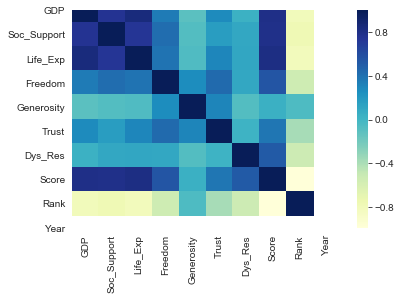

In [41]:
sns.heatmap(world.corr(), cmap = 'YlGnBu')

## Conclusion
This was a very interesting dataset to work with, especially since it is an official report released by the United Nations every year. By analyzing this data, countries can see areas they can improve in to better develop their communities and the overall mental health of their citizens. It was good see overall Happiness has increased since 2015, and I hope this trend continues. 